In [24]:
import os, gensim
import numpy as np
from gensim import utils
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
class Dataloader:
    def __iter__(self):
        for genre in ['ballads', 'elegies', 'songs', 'novels']:
            for file in os.listdir('../datasets/lemmatized/' + genre):
                with open('../datasets/lemmatized/' + genre + '/' + file, 'r', encoding='utf-8') as f:
                    fname = '../datasets/lemmatized/' + genre + '/' + file
                    if genre == 'novels':
                        author = file.split('.')[0]
                    elif genre == 'ballads':
                        author = file.split('_')[2]
                    else:
                        author = file.split('_')[1]
                    yield utils.simple_preprocess(f.read()), genre, author, fname
sentences = Dataloader()

fnames = []
texts = []
true_labels = []
authors = []

for (sent, genre, author, fname) in sentences:
    if not sent:
        continue
    texts. append(sent)
    true_labels.append(genre)
    authors.append(author)
    fnames.append(fname)

In [6]:
tagged_docs = [gensim.models.doc2vec.TaggedDocument(text, [i]) for i, text in enumerate(texts)]

In [7]:
tagged_docs[:2]

[TaggedDocument(words=['тенист', 'прохладный', 'брайнгельский', 'там', 'плескаться', 'грета', 'душист', 'ветерок', 'там', 'берег', 'пестреет', 'усеять', 'цвет', 'ходить', 'девица', 'как', 'рыбка', 'стадами', 'мой', 'конь', 'разыграться', 'пред', 'башня', 'тот', 'где', 'замок', 'дальтонский', 'стоить', 'за', 'стена', 'замок', 'на', 'башня', 'стоять', 'девица', 'души', 'мой', 'радость', 'сердце', 'царица', 'тенист', 'прохладный', 'брайнгельский', 'там', 'плескаться', 'грета', 'душист', 'ветерок', 'туда', 'мой', 'эдмонд', 'мне', 'девица', 'сказать', 'тобой', 'за', 'тебя', 'бы', 'трон', 'променять', 'ах', 'солнце', 'мой', 'ей', 'молвить', 'тоска', 'ты', 'знать', 'ли', 'кто', 'твой', 'гость', 'часовой', 'то', 'тайна', 'но', 'солнце', 'высокий', 'пора', 'мне', 'мне', 'ехать', 'далеко', 'тенист', 'прохладный', 'брайнгельский', 'там', 'плескаться', 'грета', 'душист', 'милый', 'не', 'сан', 'надежда', 'чаровать', 'на', 'сердце', 'горячий', 'сердце', 'искать', 'ты', 'ловчий', 'верно', 'любить', '

In [8]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40, workers=5)

In [9]:
model.build_vocab(tagged_docs)

In [10]:
model.train(tagged_docs, total_examples=model.corpus_count, epochs=40)

In [20]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=100)
X = kmeans.fit_predict(model.dv.vectors)
pca = PCA(n_components=16).fit(model.dv.vectors)
datapoint = pca.transform(model.dv.vectors)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
from sklearn import metrics

print("Homogeneity:", metrics.homogeneity_score(true_labels, kmeans.labels_))
print("Completeness:", metrics.completeness_score(true_labels, kmeans.labels_))
print("V-measure:", metrics.v_measure_score(true_labels, kmeans.labels_))
print("Adjusted Rand-Index:", metrics.adjusted_rand_score(true_labels, kmeans.labels_))
print("Silhouette Coefficient:", metrics.silhouette_score(model.dv.vectors, kmeans.labels_, sample_size=2000))

Homogeneity: 0.42484970440083303
Completeness: 0.6398467138054766
V-measure: 0.5106407471156272
Adjusted Rand-Index: 0.2830016742204086
Silhouette Coefficient: 0.38869655


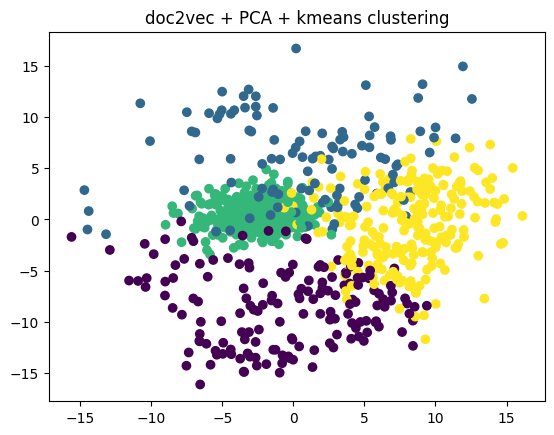

In [22]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=kmeans.labels_)
plt.title('doc2vec + PCA + kmeans clustering')
plt.show()

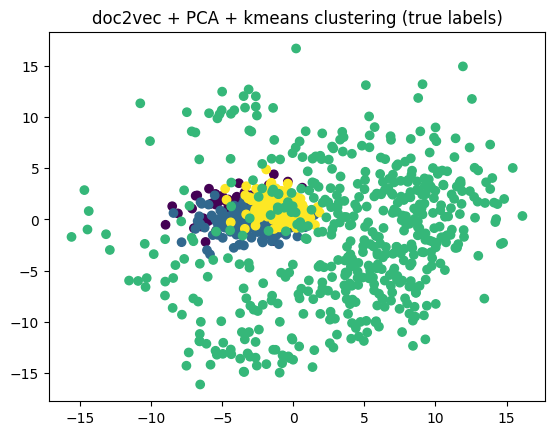

In [23]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=LabelEncoder().fit_transform(true_labels))
plt.title('doc2vec + PCA + kmeans clustering (true labels)')
plt.show()

**Authors**

In [27]:
authors_ = []
for author in authors:
    if author.endswith('.txt'):
        author = author[:-4]
    authors_.append(author)

selected_authors = [i[0] for i in Counter(authors_).most_common(11) if i[0] != 'Unknown']
true_authors = [author for author in authors if author in selected_authors]
indeces = [num for num, author in enumerate(authors) if author in selected_authors]
selected_texts = [texts[num] for num in indeces]

In [28]:
tagged_docs_authors = [gensim.models.doc2vec.TaggedDocument(text, [i]) for i, text in enumerate(selected_texts)]

In [29]:
model2 = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40, workers=5)

In [32]:
model2.build_vocab(tagged_docs_authors)
model2.train(tagged_docs_authors, total_examples=model2.corpus_count, epochs=40)

In [33]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=100)
X = kmeans.fit_predict(model2.dv.vectors)
pca = PCA(n_components=16).fit(model2.dv.vectors)
datapoint = pca.transform(model2.dv.vectors)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
print("Homogeneity:", metrics.homogeneity_score(true_authors, kmeans.labels_))
print("Completeness:", metrics.completeness_score(true_authors, kmeans.labels_))
print("V-measure:", metrics.v_measure_score(true_authors, kmeans.labels_))
print("Adjusted Rand-Index:", metrics.adjusted_rand_score(true_authors, kmeans.labels_))
print("Silhouette Coefficient:", metrics.silhouette_score(model2.dv.vectors, kmeans.labels_, sample_size=2000))

Homogeneity: 0.21485392680455345
Completeness: 0.5802242966497914
V-measure: 0.3135879335771451
Adjusted Rand-Index: 0.11090755025346956
Silhouette Coefficient: 0.3203909


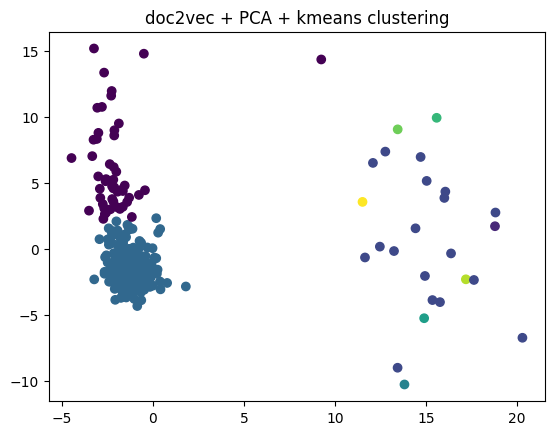

In [35]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=kmeans.labels_)
plt.title('doc2vec + PCA + kmeans clustering')
plt.show()

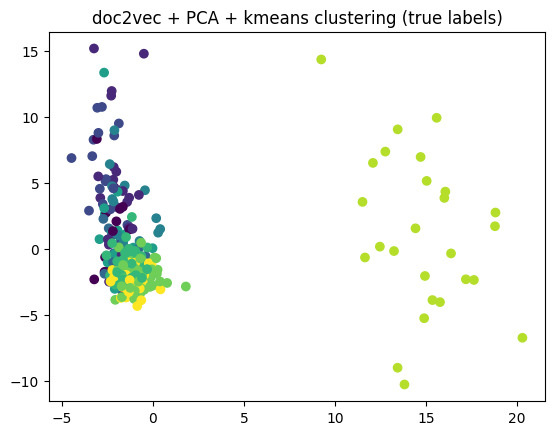

In [36]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=LabelEncoder().fit_transform(true_authors))
plt.title('doc2vec + PCA + kmeans clustering (true labels)')
plt.show()

In [43]:
novels = [num for num, genre in enumerate(true_labels) if genre == 'novels']
novels_text = [text for num, text in enumerate(texts) if num in novels]
novels_authors = [text for num, text in enumerate(authors) if num in novels]
selected_authors = [i[0] for i in Counter(novels_authors).most_common(10)]
true_authors = [author for author in authors if author in selected_authors]
indeces = [num for num, author in enumerate(authors) if author in selected_authors]
selected_texts = [texts[num] for num in indeces]

In [44]:
tagged_docs_authors = [gensim.models.doc2vec.TaggedDocument(text, [i]) for i, text in enumerate(selected_texts)]
model3 = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40, workers=5)
model3.build_vocab(tagged_docs_authors)
model3.train(tagged_docs_authors, total_examples=model3.corpus_count, epochs=40)

In [45]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=100)
X = kmeans.fit_predict(model3.dv.vectors)
pca = PCA(n_components=16).fit(model3.dv.vectors)
datapoint = pca.transform(model3.dv.vectors)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
print(
f'''homogeneity_score: {metrics.homogeneity_score(true_authors, kmeans.labels_):.4f}
completeness_score: {metrics.completeness_score(true_authors, kmeans.labels_):.4f}
v_measure_score: {metrics.v_measure_score(true_authors, kmeans.labels_):.4f}
adjusted_rand_score: {metrics.adjusted_rand_score(true_authors, kmeans.labels_):.4f}
silhouette_score: {metrics.silhouette_score(model3.dv.vectors, kmeans.labels_, sample_size=2000):.4f}'''
)

homogeneity_score: 0.9220
completeness_score: 0.9378
v_measure_score: 0.9298
adjusted_rand_score: 0.8742
silhouette_score: 0.1195


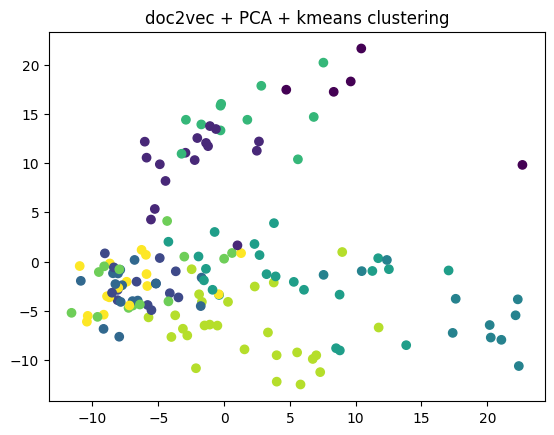

In [47]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=kmeans.labels_)
plt.title('doc2vec + PCA + kmeans clustering')
plt.show()

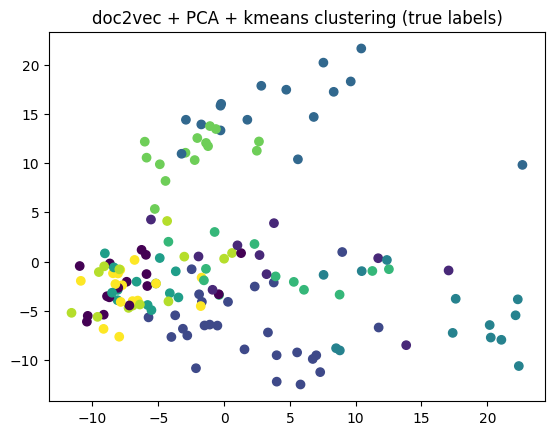

In [48]:
x = datapoint[:, 0]
y = datapoint[:, 1]

plt.scatter(x, y, c=LabelEncoder().fit_transform(true_authors))
plt.title('doc2vec + PCA + kmeans clustering (true labels)')
plt.show()